# Linear Regression


In [45]:
#Importing python library pandas

import pandas as pd
#Read csv files to showcase the data
data=pd.read_csv('boston-house-price-prediction.ipynb.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#Check the dimensions of the data
data.shape

(506, 14)

In [18]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
#return description of the data in the DataFrame and check if there are any missing values

data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
# Selct the two variables to model

data=data.loc[:,['lstat','medv']]
data.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


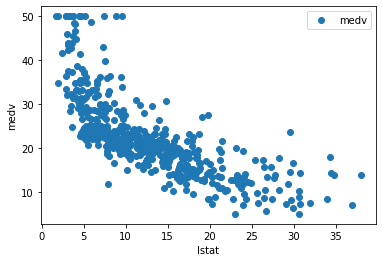

In [25]:
#Check wheather there is a linear relationship or not using matplotlib or seaborn

import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

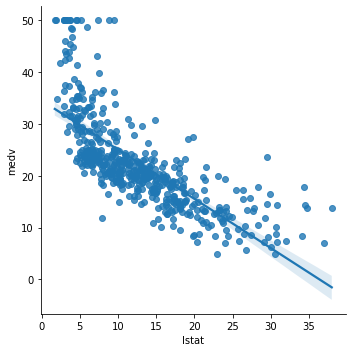

In [26]:
import seaborn as sns
sns.lmplot(x='lstat',y='medv', data=data)

In [7]:
#Read them into x and y to prepare the data

x=pd.DataFrame(data['lstat'])
y=pd.DataFrame(data['medv'])

In [8]:
x.size,y.size

(506, 506)

In [9]:
#Split it into training dataset and testing dataset
#Training dataset will work to train the model.
#Testing dataset will sork to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [11]:
#Build linear regression model.
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [12]:


#Identifying the y interceptor (value of c)
print(regressor.intercept_)

[34.33497839]


In [13]:
##Identifying the co-effecient (value of m)
#There is a negative relationship
print(regressor.coef_)

[[-0.92441715]]


In [36]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [37]:
y_train

,medv
42,25.3
58,23.3
385,7.2
78,21.2
424,11.7
...,...
255,20.9
72,22.8
396,12.5
235,24.0


In [14]:
#predict the values

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['predicted'])y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['predicted'])

In [15]:
#Predicted values
y_pred

,predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168
...,...
97,26.791734
98,30.507891
99,22.317555
100,19.830873


In [16]:
#Actual values
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [17]:
#Check the diffrent types of errors.
#R square is .52 , it means the model is not good.
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r square:',metrics.r2_score(y_test,y_pred))

mean absolute error: 5.078127727696937
mean squared error: 46.994820919547124
root mean squared error: 6.855276866731724
r square: 0.5244757432765152


# Multiple Regression

In [33]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('boston-house-price-prediction.ipynb.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [34]:
#First 13 columns are our x's and the last column is our y.

#Storing all the columns except the last column in x.
x=pd.DataFrame(dataset.iloc[:,:-1])

#Storing only the last column in y (targeted variable).
y=pd.DataFrame(dataset.iloc[:,-1])

In [35]:
#Split it into training dataset and testing dataset
#Training dataset will work to train the model.
#Testing dataset will sork to test the model.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
#Build multiple Linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
#Find the co-effecient
v=pd.DataFrame(regressor.coef_,index=['Co-effiecient']).transpose()
w=pd.DataFrame(x.columns,columns=['Attribute'])

In [38]:
v

,Co-effiecient
0,-0.112387
1,0.058059
2,0.018359
3,2.129978
4,-19.581101
5,3.095462
6,0.004453
7,-1.500476
8,0.305359
9,-0.011123


In [39]:
w

,Attribute
0,crim
1,zn
2,indus
3,chas
4,nox
5,rm
6,age
7,dis
8,rad
9,tax


In [40]:
#Concatinating the co-effecients and attributes
coeff_df=pd.concat([w,v], axis=1,join='inner')
coeff_df

,Attribute,Co-effiecient
0,crim,-0.112387
1,zn,0.058059
2,indus,0.018359
3,chas,2.129978
4,nox,-19.581101
5,rm,3.095462
6,age,0.004453
7,dis,-1.500476
8,rad,0.305359
9,tax,-0.011123


In [29]:
#The house pricing is depend on the combined effect of all independent variables. 
#The outcome of this machine learning model is a combined output of all variables.

In [43]:
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['predicted'])
y_pred

,predicted
0,32.655032
1,28.093495
2,18.029018
3,21.476716
4,18.825439
...,...
97,29.089918
98,37.119379
99,20.532710
100,17.368400


In [44]:
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r square:',metrics.r2_score(y_test,y_pred))

mean absolute error: 3.7507121808389217
mean squared error: 23.380836480270045
root mean squared error: 4.835373458200519
r square: 0.763417443213849
